In [1]:
## Import Libraries 
import pandas as pd
import numpy as np

#Calculation Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [4]:
book=  pd.read_csv('/content/book.csv',encoding='ISO-8859-1')

In [5]:
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


#EDA

In [6]:
book= book.drop(['Unnamed: 0'], axis=1)
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [7]:
Book=book.rename({'User.ID':'UserID','Book.Title':"Book_Title",'Book.Rating':"Book_Rating"},axis=1)

In [8]:
Book

,UserID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [9]:
Book[Book.duplicated()].shape

(2, 3)

In [10]:
Book[Book.duplicated()]

,UserID,Book_Title,Book_Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [11]:
Books= Book.drop_duplicates(subset=["UserID","Book_Title"])

In [12]:
Books

,UserID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [13]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UserID       9993 non-null   int64 
 1   Book_Title   9993 non-null   object
 2   Book_Rating  9993 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 312.3+ KB


In [14]:
Books.sort_values('UserID')

,UserID,Book_Title,Book_Rating
2399,8,Ancient Celtic Romances,5
2405,8,The Art Of Celtia,7
2404,8,The Celts Activity Book,6
2400,8,The Western way: A practical guide to the West...,5
2402,8,Truckers,5
...,...,...,...
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2396,278854,Blast From the Past,7


In [15]:
(Books['UserID'].unique())

array([276726, 276729, 276736, ..., 162113, 162121, 162129])

In [16]:
#number of unique users in the dataset. this is we are checking in this
len(Books['UserID'].unique())

2182

In [17]:
Books['Book_Rating'].value_counts()

8     2282
7     2074
10    1731
9     1492
5     1006
6      920
4      237
3      146
2       62
1       43
Name: Book_Rating, dtype: int64

In [18]:
len(Books['Book_Title'].unique())
## here is 9659 Book_Title in this we came to know after this code

9659

In [19]:
Books[['Book_Title']].value_counts()

Book_Title                                                                                  
Fahrenheit 451                                                                                  5
The Amber Spyglass (His Dark Materials, Book 3)                                                 4
Stardust                                                                                        4
The Subtle Knife (His Dark Materials, Book 2)                                                   4
Ender's Game (Ender Wiggins Saga (Paperback))                                                   4
                                                                                               ..
Song of Eve                                                                                     1
Song Of Troy (OME)                                                                              1
Son of \It Was a Dark and Stormy Night\: More of the Best (? from the Bulwer-Lytton Contest)    1
Son Rise: The Miracle Con

#Visualization

In [95]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [94]:
## Lets creat a ratings dataframe with average ratings and no of ratings 

In [97]:
Books.groupby('Book_Title')['Book_Rating'].mean().sort_values(ascending= False)
## the books with hgher rating has comes

Book_Title
Clear Light of Day                             10.0
Joshua and the City (The Joshua Series)        10.0
The Resourceful English Teacher                10.0
Das Tagebuch Der Bridget Jones                 10.0
Das Superwieb                                  10.0
                                               ... 
Middle Age: A Romance                           1.0
Adolf, Hitler                                   1.0
Justice: Crimes, Trials, and Punishments        1.0
A Country Courtship (Zebra Regency Romance)     1.0
A Kiss Remembered                               1.0
Name: Book_Rating, Length: 9659, dtype: float64

In [99]:
Books.groupby('Book_Title')['Book_Rating'].count().sort_values(ascending= False)
## books which get higher no of ratings

Book_Title
Fahrenheit 451                                                                                  5
The Amber Spyglass (His Dark Materials, Book 3)                                                 4
Stardust                                                                                        4
The Subtle Knife (His Dark Materials, Book 2)                                                   4
Ender's Game (Ender Wiggins Saga (Paperback))                                                   4
                                                                                               ..
Song of Eve                                                                                     1
Song Of Troy (OME)                                                                              1
Son of \It Was a Dark and Stormy Night\: More of the Best (? from the Bulwer-Lytton Contest)    1
Son Rise: The Miracle Continues                                                                 1
 Jason, M

In [100]:
ratings= pd.DataFrame(Books.groupby('Book_Title')['Book_Rating'].mean())

In [101]:
ratings

,Book_Rating
Book_Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0
"\Well, there's your problem\: Cartoons",9.0
iI Paradiso Degli Orchi,7.0


In [102]:
ratings['no of ratings']= pd.DataFrame(Books.groupby('Book_Title')['Book_Rating'].count())

In [103]:
ratings

,Book_Rating,no of ratings
Book_Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


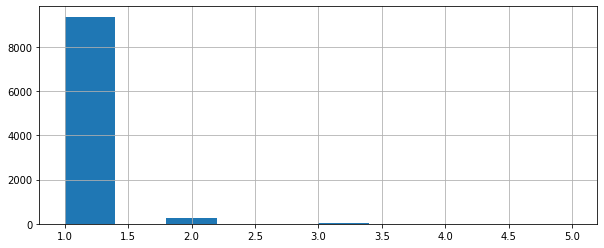

In [114]:
## histogram for no of ratings
plt.figure(figsize=(10,4))
ratings['no of ratings'].hist()

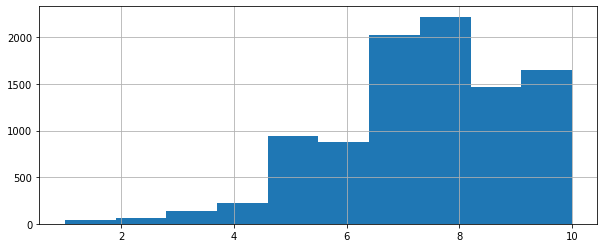

In [113]:
## histogram for Book_Rating
plt.figure(figsize=(10,4))
ratings['Book_Rating'].hist()

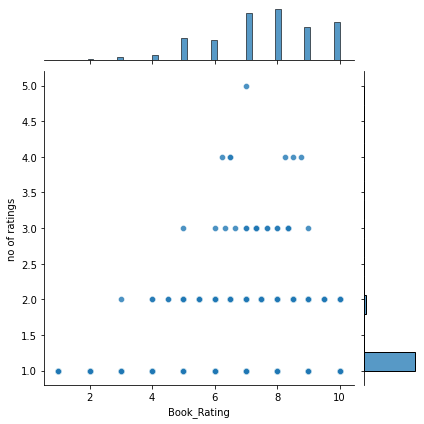

In [141]:
sn.jointplot(x='Book_Rating',y='no of ratings',data=ratings,alpha=0.8)

In [126]:
ratings[ratings['Book_Rating']==8]

,Book_Rating,no of ratings
Book_Title,,
"Jason, Madison &amp",8.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
1st to Die: A Novel,8.0,2
2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,8.0,1
2010: Odyssey Two,8.0,1
...,...,...
Zen in the Art of Archery (Vintage Spiritual Classics),8.0,1
Zombie!,8.0,1
Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),8.0,1


In [129]:
ratings['Book_Rating'].value_counts()

8.000000     2181
7.000000     1995
10.000000    1649
9.000000     1424
5.000000      947
6.000000      868
4.000000      226
3.000000      135
2.000000       59
1.000000       40
8.500000       37
7.500000       34
6.500000       29
5.500000       12
8.333333        5
7.333333        5
9.500000        4
7.666667        2
4.500000        2
8.250000        1
8.750000        1
6.250000        1
6.333333        1
6.666667        1
Name: Book_Rating, dtype: int64

In [132]:
ratings['no of ratings'].value_counts()

1    9361
2     270
3      21
4       6
5       1
Name: no of ratings, dtype: int64

#Recommendation System Analysis for Books with Correlation

In [20]:
Book_user = Books.pivot(index='UserID',
                                 columns='Book_Title',
                                 values='Book_Rating').reset_index(drop= True)

In [21]:
Book_user

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,...,Your Erroneous Zones,Your First Parakeet,"Your First Year in Network Marketing: Overcome Your Fears, Experience Success, and Achieve Your Dreams!",Your Friendship Means the World to Me (Sandra Magsamen),Your Isadora: The Love Story of Isadora Duncan &amp; Gordon Craig,Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,Your Mouth Is Lovely : A Novel,Your Name Is Renee: Ruth Kapp Hartz's Story As a Hidden Child in Nazi-Occupied France,Your Oasis on Flame Lake,Your Pregnancy After 30 (Your Pregnancy Series),Your Second Pregnancy: What to Expect This Time,"Yours Truly, Shirley","Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Youth,Yukon Ho!,Yuletide Brides (2 Novels in 1),Yuwipi: Vision and Experience in Oglala Ritual,Z for Zachariah,ZANZIBAR CAT,Zeit im Wind.,Zen Meditations on Being a Mother (Zen Meditations),Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zen in the Art of Archery (Vintage Spiritual Classics),Zen: A Way of Life (Teach Yourself Books),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie!,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,

In [142]:
ratings.sort_values('no of ratings',ascending=False)

,Book_Rating,no of ratings
Book_Title,,
Fahrenheit 451,7.00,5
"The Subtle Knife (His Dark Materials, Book 2)",8.75,4
Ender's Game (Ender Wiggins Saga (Paperback)),6.25,4
Stardust,8.50,4
Charlie and the Chocolate Factory,6.50,4
...,...,...
"His-And-Hers Twins (Harlequin American Romance, No. 820)",10.00,1
Histoires Extraordinaires,7.00,1
Historia de la vida del BuscÃ³n (Selecciones Austral ; 24 : ClÃ¡sicos),10.00,1


In [143]:
## Lets chose two book: Fahrenheit 451 & The Subtle Knife (His Dark Materials, Book 2)
ratings

,Book_Rating,no of ratings
Book_Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


In [148]:
Fahrenheit_ratings = Book_user['Fahrenheit 451']
Subtle_Knife_ratings = Book_user['The Subtle Knife (His Dark Materials, Book 2)']

In [150]:
Fahrenheit.head()
## this means user 272726, 276729 and so on may be haven't gives the ratings to this
## as the data is big so there may be few ratings for this.
## with this above code of Fahrenheit_ratings we are checking that how many user id had given the ratings to it

276726    0.0
276729    0.0
276736    0.0
276737    0.0
276744    0.0
Name: Fahrenheit 451, dtype: float64

In [147]:
Subtle_Knife.head()

276726    0.0
276729    0.0
276736    0.0
276737    0.0
276744    0.0
Name: The Subtle Knife (His Dark Materials, Book 2), dtype: float64

In [151]:
## Now we can find the correlation with two pandas series by method corrwith()

In [152]:
similar_Fahrenheit_ratings = Book_user.corrwith(Fahrenheit_ratings)
similar_Subtle_Knife_ratings = Book_user.corrwith(Subtle_Knife_ratings)

In [153]:
##lets clean this by removing NAN values and using a data frame instead of series
corr_Fahrenheit= pd.DataFrame(similar_Fahrenheit_ratings, columns=['Correlation'])
corr_Fahrenheit.dropna(inplace= True)
corr_Fahrenheit

,Correlation
Book_Title,
"Jason, Madison &amp",-0.000958
Other Stories;Merril;1985;McClelland &amp,-0.000958
Repairing PC Drives &amp,-0.000958
'48,-0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",-0.000958
"\Well, there's your problem\: Cartoons",-0.000958
iI Paradiso Degli Orchi,-0.000958


In [156]:
## now if we sort the dataframe by correlation, we should get the most similar books.However note that we will get some results that donot really make sense.
##This is because there are lot of books only ready once by user who also read  Fahrenheit(as it was the most popular book)

In [161]:
corr_Fahrenheit.sort_values('Correlation', ascending=False)

,Correlation,no of ratings
Book_Title,,
Fahrenheit 451,1.000000,5
The Day I Swapped My Dad for 2 Goldfish,0.596326,1
"The Doll's House (Sandman, Book 2)",0.596326,1
Mr. Punch,0.596326,1
Contes de fÃ?Â©es Ã?Â l'usage des moyennes personnes,0.596326,1
...,...,...
Strangers,-0.001657,3
"The Amber Spyglass (His Dark Materials, Book 3)",-0.001836,4
Charlie and the Chocolate Factory,-0.001890,4


In [155]:
## let's fix by filtering out books that have reviews less than 5

In [162]:
corr_Fahrenheit= corr_Fahrenheit.join(ratings['no of ratings'])
corr_Fahrenheit.head()

ValueError: ignored

In [163]:
corr_Fahrenheit

,Correlation,no of ratings
Book_Title,,
"Jason, Madison &amp",-0.000958,1
Other Stories;Merril;1985;McClelland &amp,-0.000958,1
Repairing PC Drives &amp,-0.000958,1
'48,-0.000958,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",-0.000958,1
"\Well, there's your problem\: Cartoons",-0.000958,1
iI Paradiso Degli Orchi,-0.000958,1


In [164]:
corr_Fahrenheit[corr_Fahrenheit['no of ratings']>1].sort_values('Correlation',ascending=True).head()

,Correlation,no of ratings
Book_Title,,
Stardust,-0.001908,4
"The Subtle Knife (His Dark Materials, Book 2)",-0.001903,4
Charlie and the Chocolate Factory,-0.001890,4
"The Amber Spyglass (His Dark Materials, Book 3)",-0.001836,4
Strangers,-0.001657,3


# Recommendation Sustem Analysis with Cosine Similarities

In [22]:
Book_user.index = Books['UserID'].unique()
## here with this code we had assigned index with the userid values

In [23]:
Book_user

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,...,Your Erroneous Zones,Your First Parakeet,"Your First Year in Network Marketing: Overcome Your Fears, Experience Success, and Achieve Your Dreams!",Your Friendship Means the World to Me (Sandra Magsamen),Your Isadora: The Love Story of Isadora Duncan &amp; Gordon Craig,Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,Your Mouth Is Lovely : A Novel,Your Name Is Renee: Ruth Kapp Hartz's Story As a Hidden Child in Nazi-Occupied France,Your Oasis on Flame Lake,Your Pregnancy After 30 (Your Pregnancy Series),Your Second Pregnancy: What to Expect This Time,"Yours Truly, Shirley","Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Youth,Yukon Ho!,Yuletide Brides (2 Novels in 1),Yuwipi: Vision and Experience in Oglala Ritual,Z for Zachariah,ZANZIBAR CAT,Zeit im Wind.,Zen Meditations on Being a Mother (Zen Meditations),Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zen in the Art of Archery (Vintage Spiritual Classics),Zen: A Way of Life (Teach Yourself Books),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie!,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276

In [24]:
#Impute those NaNs with 0 values
## Replace null values with 0
Book_user.fillna(0, inplace=True)

In [25]:
Book_user

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,...,Your Erroneous Zones,Your First Parakeet,"Your First Year in Network Marketing: Overcome Your Fears, Experience Success, and Achieve Your Dreams!",Your Friendship Means the World to Me (Sandra Magsamen),Your Isadora: The Love Story of Isadora Duncan &amp; Gordon Craig,Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,Your Mouth Is Lovely : A Novel,Your Name Is Renee: Ruth Kapp Hartz's Story As a Hidden Child in Nazi-Occupied France,Your Oasis on Flame Lake,Your Pregnancy After 30 (Your Pregnancy Series),Your Second Pregnancy: What to Expect This Time,"Yours Truly, Shirley","Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Youth,Yukon Ho!,Yuletide Brides (2 Novels in 1),Yuwipi: Vision and Experience in Oglala Ritual,Z for Zachariah,ZANZIBAR CAT,Zeit im Wind.,Zen Meditations on Being a Mother (Zen Meditations),Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zen in the Art of Archery (Vintage Spiritual Classics),Zen: A Way of Life (Teach Yourself Books),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie!,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276

# Calculation Of Cosine Similarities

In [26]:
user_sim = 1 - pairwise_distances( Book_user.values,metric='cosine')
##here pairwise is calculating the distance and we want to calculate the similarities.
##so we are doing 1- pairwise_distance for calculating the similarities.

In [27]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [29]:
#Set the index and column names to user ids by unique function
user_sim_df.index = Books.UserID.unique()
user_sim_df.columns = Books.UserID.unique()

In [30]:
user_sim_df.iloc[0:25, 0:25]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796,276798,276800,276804,276808,276811
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
## here we are converting digonal to zero so that we can visualize data of variables with another variables not with itself
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:25, 0:25]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796,276798,276800,276804,276808,276811
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#Most Similar Users
## here we checking the idusers who are having maximum similarites
user_sim_df.idxmax(axis=1)[100:150]

277053    276726
277056    276726
277058    276726
277065    276726
277072      3693
277074    276726
277079    276726
277085    276726
277087    276726
277090    276726
277094    276726
277096    276726
277107    276726
277109    276726
277116    276726
277124    276726
277128    277196
277129      3114
277134    276726
277135    276726
277139    276726
277143    276726
277157    276726
277159    276726
277165    276726
277168    276726
277170      3604
277171    276726
277179    276726
277186    276726
277187    276726
277188    276726
277189    276726
277195    276726
277196    277128
277197      3472
277203      3875
277205      1650
277212    276726
277220    276726
277221    276726
277228    276726
277229    276726
277230    276726
277231    276726
277232    276726
277235    276726
277237    276726
277240    276726
277242    276726
dtype: int64

# Checking Books Similarities between UserID 276729 and 276726

In [33]:
Books[(Books['UserID']==276729) | (Books['UserID']==276726)]
## here we are checking the similarities with 6 and 168 as they have something is similar

,UserID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [34]:
user_1=Books[Books['UserID']==276729]

In [39]:
user_2=Books[Books['UserID']==276726]

In [40]:
user_2['Book_Title']

0    Classical Mythology
Name: Book_Title, dtype: object

In [41]:
user_1['Book_Title']

1            Clara Callan
2    Decision in Normandy
Name: Book_Title, dtype: object

In [42]:
pd.merge(user_1,user_2,on='Book_Title',how='outer')
## here merge is used to join a table 
## how='outer' is used to display all the records
#if how='inner'is used than the reslt with common will come

,UserID_x,Book_Title,Book_Rating_x,UserID_y,Book_Rating_y
0,276729.0,Clara Callan,3.0,NaN,NaN
1,276729.0,Decision in Normandy,6.0,NaN,NaN
2,NaN,Classical Mythology,NaN,276726.0,5.0


# Checking Books Similarities between UserID 276748 and 161677

In [43]:
Books[(Books['UserID']==276748) | (Books['UserID']==161677)]
## here we are checking the similarities with 276748 and 161677 as they have something is similar

,UserID,Book_Title,Book_Rating
12,276748,The Middle Stories,6
9190,161677,The Biggest Pumpkin Ever,8
9191,161677,The Twelve Dancing Princesses: A Folk Tale fro...,9
9192,161677,Do You Know?,5
9193,161677,The good-by day (A Little golden book),8
9194,161677,Pooh Trick or Treat! (Little Golden Books),6
9195,161677,Cookie Monster/Cookie Tree,8
9196,161677,My Little Golden Book of Cars and Trucks (Litt...,7
9197,161677,I Think That It is Wonderful: Featuring Jim He...,8
9198,161677,Grover's Own Alphabet,8


In [44]:
user_3=Books[Books['UserID']==276748]

In [45]:
user_4=Books[Books['UserID']==161677]

In [46]:
user_3

,UserID,Book_Title,Book_Rating
12,276748,The Middle Stories,6


In [47]:
user_4

,UserID,Book_Title,Book_Rating
9190,161677,The Biggest Pumpkin Ever,8
9191,161677,The Twelve Dancing Princesses: A Folk Tale fro...,9
9192,161677,Do You Know?,5
9193,161677,The good-by day (A Little golden book),8
9194,161677,Pooh Trick or Treat! (Little Golden Books),6
9195,161677,Cookie Monster/Cookie Tree,8
9196,161677,My Little Golden Book of Cars and Trucks (Litt...,7
9197,161677,I Think That It is Wonderful: Featuring Jim He...,8
9198,161677,Grover's Own Alphabet,8
9199,161677,Best Little Word Book Ever! (Little Golden Book),10


In [48]:
pd.merge(user_3,user_4,on='Book_Title',how='outer')
## here merge is used to join a table 
## how='outer' is used to display all the records
#if how='inner'is used than the reslt with common will come

,UserID_x,Book_Title,Book_Rating_x,UserID_y,Book_Rating_y
0,276748.0,The Middle Stories,6.0,NaN,NaN
1,NaN,The Biggest Pumpkin Ever,NaN,161677.0,8.0
2,NaN,The Twelve Dancing Princesses: A Folk Tale fro...,NaN,161677.0,9.0
3,NaN,Do You Know?,NaN,161677.0,5.0
4,NaN,The good-by day (A Little golden book),NaN,161677.0,8.0
5,NaN,Pooh Trick or Treat! (Little Golden Books),NaN,161677.0,6.0
6,NaN,Cookie Monster/Cookie Tree,NaN,161677.0,8.0
7,NaN,My Little Golden Book of Cars and Trucks (Litt...,NaN,161677.0,7.0
8,NaN,I Think That It is Wonderful: Featuring Jim He...,NaN,161677.0,8.0
9,NaN,Grover's Own Alphabet,NaN,161677.0,8.0


# Checking Books Similarities between UserID 276772 and 1491

In [50]:
Books[(Books['UserID']==276772) | (Books['UserID']==1491)]
## here we are checking the similarities with 276772 and 1491 as they have something is similar

,UserID,Book_Title,Book_Rating
22,276772,If I'd Known Then What I Know Now: Why Not Lea...,7
23,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
24,276772,Tell Me This Isn't Happening,10
4107,1491,Fifth business,7


In [53]:
user_5 =Books[Books['UserID']==276772]

In [55]:
user_6=Books[Books['UserID']==1491]

In [56]:
user_5

,UserID,Book_Title,Book_Rating
22,276772,If I'd Known Then What I Know Now: Why Not Lea...,7
23,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
24,276772,Tell Me This Isn't Happening,10


In [57]:
user_6

,UserID,Book_Title,Book_Rating
4107,1491,Fifth business,7


In [58]:
pd.merge(user_5,user_6,on='Book_Title',how='outer')
## here merge is used to join a table 

,UserID_x,Book_Title,Book_Rating_x,UserID_y,Book_Rating_y
0,276772.0,If I'd Known Then What I Know Now: Why Not Lea...,7.0,NaN,NaN
1,276772.0,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10.0,NaN,NaN
2,276772.0,Tell Me This Isn't Happening,10.0,NaN,NaN
3,NaN,Fifth business,NaN,1491.0,7.0


# Checking Books Similarities between UserID 276820 and 3462

In [60]:
Books[(Books['UserID']==276820) | (Books['UserID']==3462)]
## here we are checking the similarities with 276820 and 3462 as they have something is similar

,UserID,Book_Title,Book_Rating
54,276820,All the King's Men,9
6693,3462,Convergent Series,9
6694,3462,The Barsoom Project,9
6695,3462,"Star Trek III The Search for Spock (Star Trek,...",9
6696,3462,Dancers of Arun,8
6697,3462,PROMETHEUS DESIGN,10
6698,3462,Star Trek the New Voyages #2,8
6699,3462,Alchemy and Academe,8


In [61]:
user7= Books[Books['UserID']==276820]

In [62]:
user8= Books[Books['UserID']==3462]

In [63]:
user7

,UserID,Book_Title,Book_Rating
54,276820,All the King's Men,9


In [64]:
user8

,UserID,Book_Title,Book_Rating
6693,3462,Convergent Series,9
6694,3462,The Barsoom Project,9
6695,3462,"Star Trek III The Search for Spock (Star Trek,...",9
6696,3462,Dancers of Arun,8
6697,3462,PROMETHEUS DESIGN,10
6698,3462,Star Trek the New Voyages #2,8
6699,3462,Alchemy and Academe,8


In [66]:
pd.merge(user7,user8,on='Book_Title', how='outer')
## here merge is used to join a table 

,UserID_x,Book_Title,Book_Rating_x,UserID_y,Book_Rating_y
0,276820.0,All the King's Men,9.0,NaN,NaN
1,NaN,Convergent Series,NaN,3462.0,9.0
2,NaN,The Barsoom Project,NaN,3462.0,9.0
3,NaN,"Star Trek III The Search for Spock (Star Trek,...",NaN,3462.0,9.0
4,NaN,Dancers of Arun,NaN,3462.0,8.0
5,NaN,PROMETHEUS DESIGN,NaN,3462.0,10.0
6,NaN,Star Trek the New Voyages #2,NaN,3462.0,8.0
7,NaN,Alchemy and Academe,NaN,3462.0,8.0


# Checking Books Similarities between UserID 277197 and 3472

In [84]:
Books[(Books['UserID']==277197)|(Books['UserID']== 3472)]
## here we are checking the similarities with 277197 and 3472 as they have something is similar

,UserID,Book_Title,Book_Rating
516,277197,The Bean Trees,8
517,277197,Homeland and Other Stories,7
518,277197,"A Suitable Boy : Novel, A",8
519,277197,Daughter of Fortune,6
6715,3472,Muggable Mary,10
6716,3472,Once and Future King,8
6717,3472,EAGLES GIFT,9


In [78]:
user9 = Books[Books['UserID']==277197]

In [79]:
user10 = Books[Books['UserID']==3472]

In [80]:
user9

,UserID,Book_Title,Book_Rating
516,277197,The Bean Trees,8
517,277197,Homeland and Other Stories,7
518,277197,"A Suitable Boy : Novel, A",8
519,277197,Daughter of Fortune,6


In [81]:
user10

,UserID,Book_Title,Book_Rating
6715,3472,Muggable Mary,10
6716,3472,Once and Future King,8
6717,3472,EAGLES GIFT,9


In [83]:
pd.merge(user9,user10,on ='Book_Title',how='outer')

,UserID_x,Book_Title,Book_Rating_x,UserID_y,Book_Rating_y
0,277197.0,The Bean Trees,8.0,NaN,NaN
1,277197.0,Homeland and Other Stories,7.0,NaN,NaN
2,277197.0,"A Suitable Boy : Novel, A",8.0,NaN,NaN
3,277197.0,Daughter of Fortune,6.0,NaN,NaN
4,NaN,Muggable Mary,NaN,3472.0,10.0
5,NaN,Once and Future King,NaN,3472.0,8.0
6,NaN,EAGLES GIFT,NaN,3472.0,9.0
